# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [34]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [35]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [36]:
import requests
import api_keys  # Assuming you have an api_keys.py file with your API key

# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    api_key = api_keys.weather_api_key
    city_url = f"{base_url}q={city}&appid={api_key}"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send a GET request to the OpenWeatherMap API
        response = requests.get(city_url)

        # If the request was successful (status code 200), retrieve the weather data
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"Error: {response.status_code}")
        
    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | zhigalovo
Processing Record 3 of Set 1 | tofol
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | pisco
Processing Record 9 of Set 1 | enriquillo
Processing Record 10 of Set 1 | rongelap
Processing Record 11 of Set 1 | daru
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | sitka
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | greenwood
Processing Record 19 of Set 1 | novyy urgal
Processing Record 20 of Set 1 | fale old settlement
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | edinburgh of the seven seas
Proce

In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,271.55,83,100,4.09,RU,1685053255
1,zhigalovo,54.8097,105.1578,276.83,90,100,1.34,RU,1685053854
2,tofol,5.3248,163.0078,301.27,78,80,4.26,FM,1685053263
3,college,64.8569,-147.8028,295.42,32,75,4.63,US,1685053008
4,ribeira grande,38.5167,-28.7000,290.25,82,41,4.92,PT,1685053854


In [39]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,271.55,83,100,4.09,RU,1685053255
1,zhigalovo,54.8097,105.1578,276.83,90,100,1.34,RU,1685053854
2,tofol,5.3248,163.0078,301.27,78,80,4.26,FM,1685053263
3,college,64.8569,-147.8028,295.42,32,75,4.63,US,1685053008
4,ribeira grande,38.5167,-28.7000,290.25,82,41,4.92,PT,1685053854


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

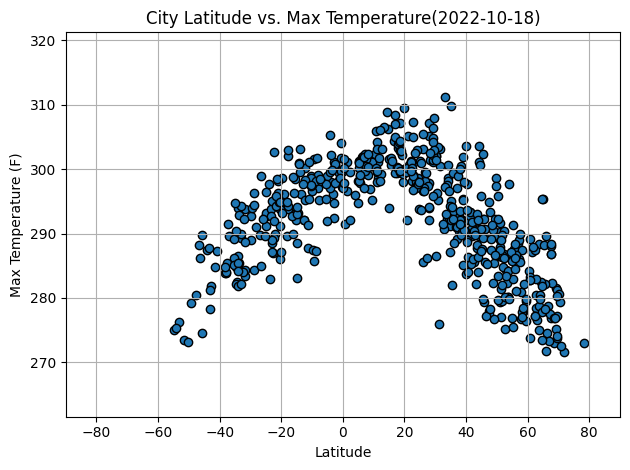

In [41]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

plt.title("City Latitude vs. Max Temperature(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid(True)
plt.tight_layout()
# Incorporate the other graph properties
plt.xlim(-90, 90)
plt.ylim(min(city_data_df["Max Temp"]) - 10, max(city_data_df["Max Temp"]) + 10)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

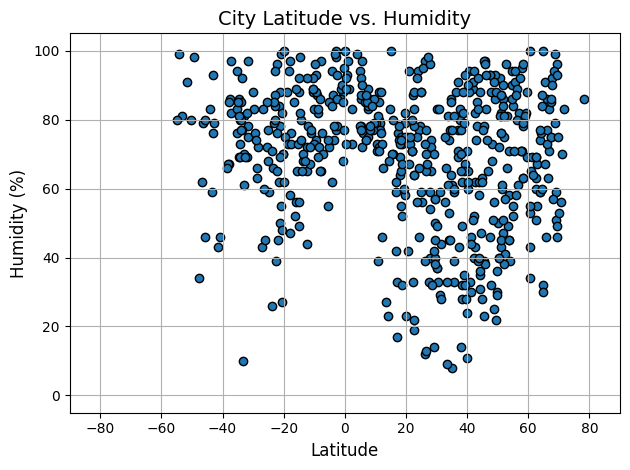

In [42]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

plt.title("City Latitude vs. Humidity", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)

plt.grid(True)
plt.tight_layout()

plt.xlim(-90, 90)
plt.ylim(-5, 105)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

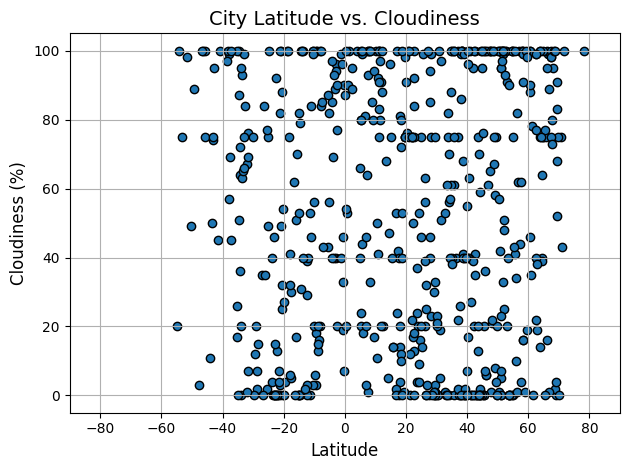

In [43]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

plt.title("City Latitude vs. Cloudiness", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)

plt.grid(True)
plt.tight_layout()

plt.xlim(-90, 90)
plt.ylim(-5, 105)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

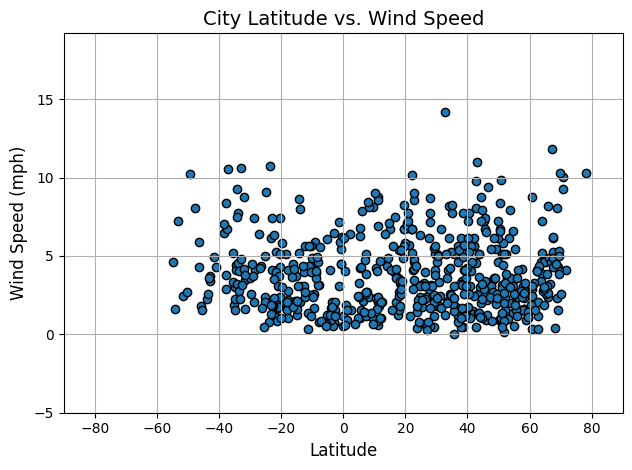

In [44]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

plt.title("City Latitude vs. Wind Speed", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (mph)", fontsize=12)

plt.grid(True)
plt.tight_layout()

plt.xlim(-90, 90)
plt.ylim(min(city_data_df["Wind Speed"]) - 5, max(city_data_df["Wind Speed"]) + 5)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, save_path):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate the regression line
    regression_line = slope * x_values + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values)

    # Plot the regression line
    plt.plot(x_values, regression_line, color='red')

    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Display the r-squared value
    plt.annotate(f"R^2 = {r_value**2:.2f}", (0.2, 0.9), xycoords='axes fraction', fontsize=12)


In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.loc[:, "Max Temp"] = (northern_hemi_df["Max Temp"] - 273.15) * 9/5 + 32



# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,29.120,83,100,4.09,RU,1685053255
1,zhigalovo,54.8097,105.1578,38.624,90,100,1.34,RU,1685053854
2,tofol,5.3248,163.0078,82.616,78,80,4.26,FM,1685053263
3,college,64.8569,-147.8028,72.086,32,75,4.63,US,1685053008
4,ribeira grande,38.5167,-28.7000,62.780,82,41,4.92,PT,1685053854


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df.loc[:, "Max Temp"] = (southern_hemi_df["Max Temp"] - 273.15) * 9/5 + 32
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,port-aux-francais,-49.3500,70.2167,42.908,98,89,10.24,TF,1685053854
7,pisco,-13.7000,-76.2167,73.454,68,100,3.09,PE,1685053263
10,daru,-9.0763,143.2092,77.936,87,100,5.86,PG,1685053266
13,new norfolk,-42.7826,147.0587,47.714,79,95,3.74,AU,1685053854
14,punta arenas,-53.1500,-70.9167,37.508,81,75,7.20,CL,1685053260


###  Temperature vs. Latitude Linear Regression Plot

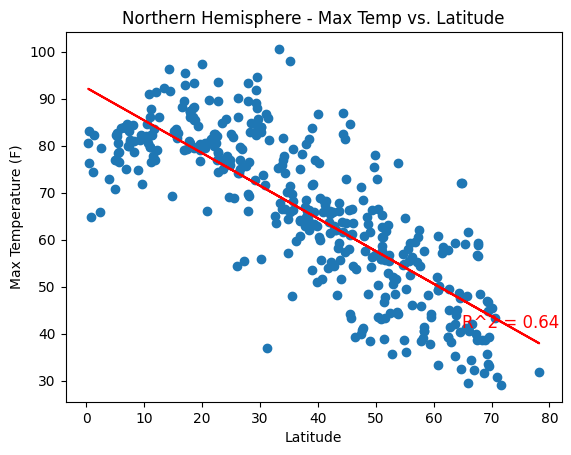

In [48]:
# Linear regression on Northern Hemisphere

def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, save_path):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_line, color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(f"R^2 = {r_value**2:.2f}", xy=(0.8, 0.2), xycoords='axes fraction', fontsize=12, color='red')
    plt.savefig(save_path)
    plt.show()

create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (F)", "Northern Hemisphere - Max Temp vs. Latitude", "../output_data/northern_hemi_max_temp_vs_latitude.png")

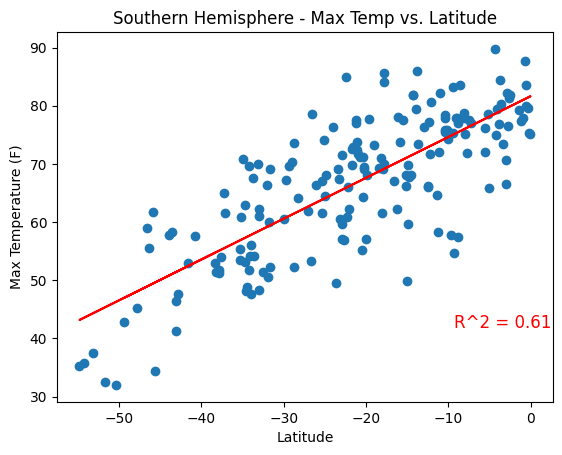

In [49]:
# Linear regression on Southern Hemisphere
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, save_path):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_line, color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(f"R^2 = {r_value**2:.2f}", xy=(0.8, 0.2), xycoords='axes fraction', fontsize=12, color='red')
    plt.savefig(save_path)
    plt.show()

create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (F)", "Southern Hemisphere - Max Temp vs. Latitude", "../output_data/southern_hemi_max_temp_vs_latitude.png")

**Discussion about the linear relationship:** Both graphs show that the further you move away from the equator the lower the tempature gets.

### Humidity vs. Latitude Linear Regression Plot

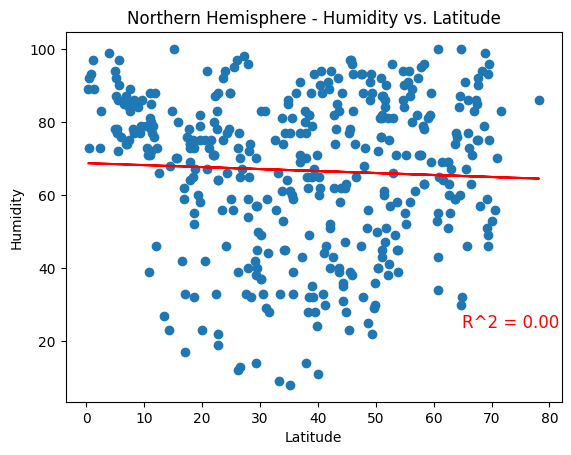

In [50]:
# Northern Hemisphere
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, save_path):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_line, color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(f"R^2 = {r_value**2:.2f}", xy=(0.8, 0.2), xycoords='axes fraction', fontsize=12, color='red')
    plt.savefig(save_path)
    plt.show()

create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Northern Hemisphere - Humidity vs. Latitude", "../output_data/northern_hemi_humidity_vs_latitude.png")

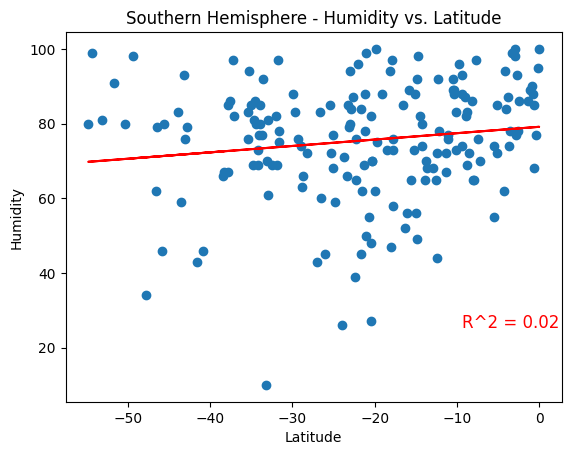

In [51]:
# Southern Hemisphere
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, save_path):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_line, color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(f"R^2 = {r_value**2:.2f}", xy=(0.8, 0.2), xycoords='axes fraction', fontsize=12, color='red')
    plt.savefig(save_path)
    plt.show()

create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Southern Hemisphere - Humidity vs. Latitude", "../output_data/southern_hemi_humidity_vs_latitude.png")

**Discussion about the linear relationship:** Both graphs so that the humidity is much greater north of the equator, as the latitude move further north from the southern hemisphere to the northern hemisphere you get higher humidity points

### Cloudiness vs. Latitude Linear Regression Plot

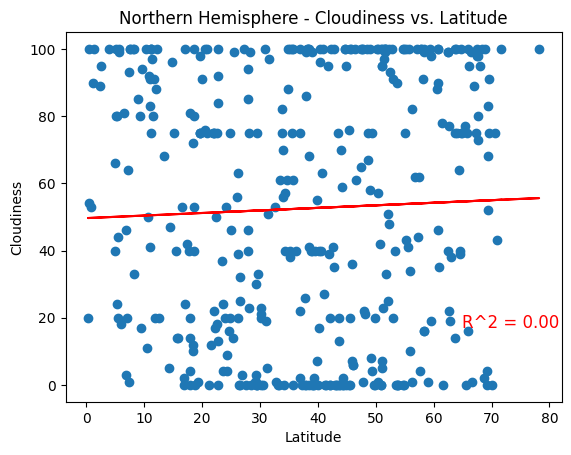

In [52]:
# Northern Hemisphere
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, save_path):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_line, color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(f"R^2 = {r_value**2:.2f}", xy=(0.8, 0.2), xycoords='axes fraction', fontsize=12, color='red')
    plt.savefig(save_path)
    plt.show()

create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Northern Hemisphere - Cloudiness vs. Latitude", "../output_data/northern_hemi_cloudiness_vs_latitude.png")

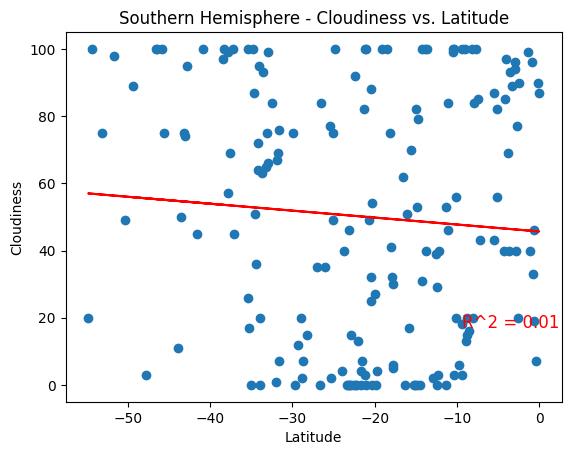

In [53]:
# Southern Hemisphere
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, save_path):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_line, color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(f"R^2 = {r_value**2:.2f}", xy=(0.8, 0.2), xycoords='axes fraction', fontsize=12, color='red')
    plt.savefig(save_path)
    plt.show()

create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Southern Hemisphere - Cloudiness vs. Latitude", "../output_data/southern_hemi_cloudiness_vs_latitude.png")

**Discussion about the linear relationship:** In both graphs there is no real major correlation to the to the lattitude, but the graphs show that there tends to be more cloud coverage in the northern hemisphere instead of the southern.

### Wind Speed vs. Latitude Linear Regression Plot

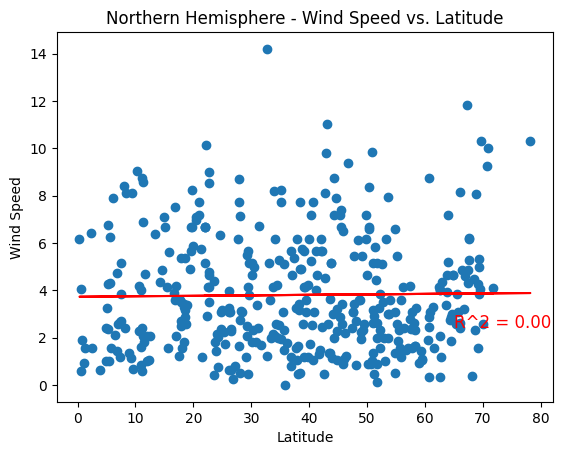

In [54]:
# Northern Hemisphere
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, save_path):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_line, color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(f"R^2 = {r_value**2:.2f}", xy=(0.8, 0.2), xycoords='axes fraction', fontsize=12, color='red')
    plt.savefig(save_path)
    plt.show()

create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Northern Hemisphere - Wind Speed vs. Latitude", "../output_data/northern_hemi_wind_speed_vs_latitude.png")

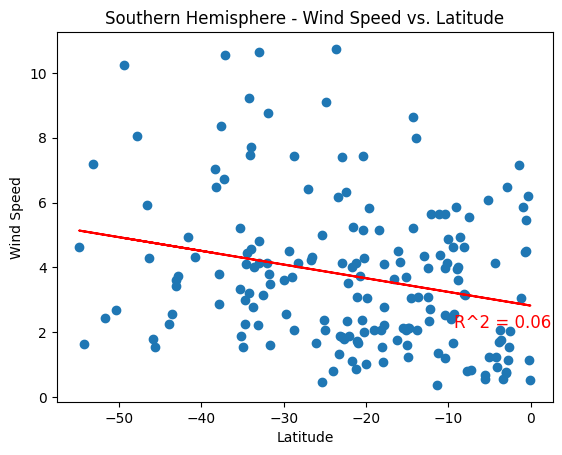

In [55]:
# Southern Hemisphere
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, save_path):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_line, color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(f"R^2 = {r_value**2:.2f}", xy=(0.8, 0.2), xycoords='axes fraction', fontsize=12, color='red')
    plt.savefig(save_path)
    plt.show()

create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Southern Hemisphere - Wind Speed vs. Latitude", "../output_data/southern_hemi_wind_speed_vs_latitude.png")

**Discussion about the linear relationship:** In the northern hemisphere chart it shows that there in no real correlation in the wind speed and the latitude. Although in the southern hemisphere chart it shows as the closer you get to the equator the wind speeds seem to decrease. 